<a href="https://colab.research.google.com/github/hyper-mage/LandingAI/blob/main/FaceFocus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook runs off a model created in [LandingAI](https://app.landing.ai/)
Makes for a quick and easy way for developing and testing CV projects such as this small one that evaluates if a user is looking at the camera or not

In [ ]:
# !pip install landingai
from landingai.predict import Predictor
from landingai.image_source_ops import take_photo_from_webcam
from landingai.visualize import overlay_bboxes

In [ ]:
# Enter your API Key
endpoint_id = "b5e07f7b-2b11-42b3-99fb-ebf4d63005f6"
from google.colab import userdata
api_key = userdata.get('landingai_api_key')

In [ ]:
# Build predictor object for  your model
model = Predictor(endpoint_id, api_key=api_key)

<IPython.core.display.Javascript object>

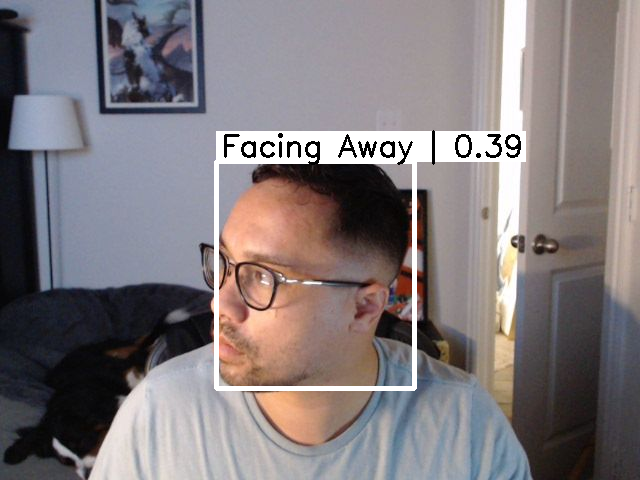

In [ ]:
# Grab image from webcam
# face away
image = take_photo_from_webcam(1)
prediction = model.predict(image)
overlay_bboxes(prediction, image)

<IPython.core.display.Javascript object>

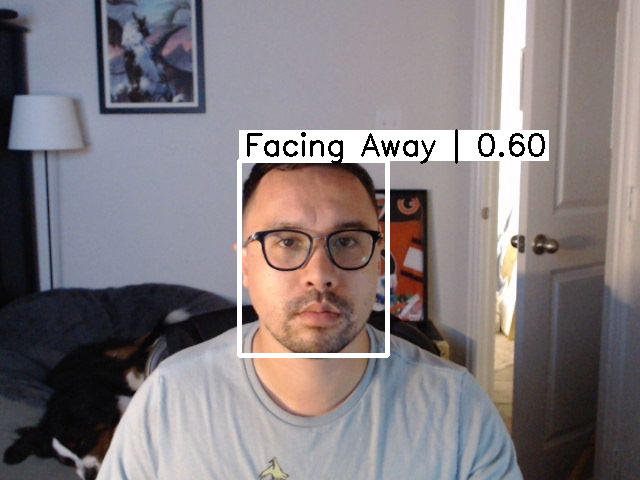

In [ ]:
# face camera
image = take_photo_from_webcam(1)
prediction = model.predict(image)
overlay_bboxes(prediction, image)

Nice it did a bad job. The model will need to be retrained with better data

Next part I want to play around with is live data

In [ ]:
from landingai.pipeline import FrameSet

# inference on one image
frs = FrameSet.from_image('image.jpg')